# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [Aristo Bima]
- **Email:** [aristobim4@mail.ugm.ac.id]
- **ID Dicoding:** [Aristo Bima]

# <span style="color:red"> ***** Penilaian 1. Memberikan dokumentasi menggunakan markdown/text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan analisis data *****</span>

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana Distribusi PM2.5 pada wilayah tersebut? 
- Pertanyaan 2 : Bagaimana Korelasi antar Variabel ?
- Pertanyaan 3 : Bagaimana Tren harian PM2.5 pada daerah tersebut ?
- Pertanyaan 4 : Bagaimana Boxplot yang menggambarkan perbedaan PM2.5 Berdasarkan Stasiun ?
- Pertanyaan 5 : Bagaimana Pengaruh antara hujan dan polusi udara ?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st 



## Data Wrangling

### Gathering Data

In [5]:
st.title("Gathering Data")
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")  # Gantilah sesuai file yang diinginkan


2025-04-24 10:10:42.800 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.423 
  command:

    streamlit run C:\Users\ACER\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-24 10:10:43.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


**Insight:**
Sumber Data yang Digunakan

Data polusi udara dikumpulkan berdasarkan parameter kualitas udara seperti PM2.5, PM10, SO2, NO2, CO, dan O3.
Data cuaca seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), hujan (RAIN), arah angin (wd), dan kecepatan angin (WSPM) juga dikumpulkan.
Data bersifat time-series, mencakup informasi tahun, bulan, hari, dan jam, yang penting untuk analisis tren dan pola temporal.
Metode Pengumpulan Data

Data kemungkinan diperoleh dari sensor udara atau stasiun pemantauan lingkungan yang mencatat parameter polusi udara secara berkala.
Bisa juga berasal dari sumber eksternal seperti API cuaca, data pemerintah, atau dataset terbuka mengenai kualitas udara.
Tantangan dalam Gathering Data

Kehilangan data (missing values): Beberapa sensor mungkin gagal mencatat nilai tertentu pada waktu tertentu.
Konsistensi format data: Data dari berbagai sumber bisa memiliki format yang berbeda, sehingga perlu disesuaikan sebelum analisis.
Kualitas data: Harus dipastikan bahwa data yang dikumpulkan akurat dan dapat dipercaya sebelum digunakan dalam analisis.
Strategi Peningkatan Kualitas Data

Memvalidasi sumber data sebelum digunakan dalam analisis.
Menggabungkan data dari berbagai sumber untuk mendapatkan informasi yang lebih lengkap.
Melakukan pengecekan awal terhadap distribusi data dan outlier untuk menghindari analisis yang sala

### Assessing Data

In [6]:
st.title("Assessing Data")

# Mengakses Data (Accessing Data)
print("Menampilkan 5 data pertama:")
print(df.head())

print("\nMenampilkan informasi dataset:")
print(df.info())

print("\nMenampilkan statistik deskriptif:")
print(df.describe())

2025-04-24 10:10:43.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Menampilkan 5 data pertama:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  

Menampilkan informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

**Insight:** Assessing Data

Missing Values (Nilai Hilang)
Beberapa kolom seperti PM2.5, PM10, SO2, NO2, CO, dan O3 bisa memiliki data yang kosong akibat kegagalan sensor atau pencatatan.
Solusi: Bisa diatasi dengan imputasi nilai (mean, median, atau interpolasi) atau menghapus data jika jumlahnya terlalu banyak.

Duplicate Data (Data Duplikat)
Data mungkin memiliki baris yang sama persis karena kesalahan pencatatan.
Solusi: Gunakan .duplicated().sum() untuk mendeteksi, lalu hapus dengan .drop_duplicates().

Inconsistent Data (Data Tidak Konsisten)
Contoh: Kolom "wd" (wind direction) mungkin memiliki variasi penulisan seperti North, N, Utara.
Solusi: Standarisasi format menggunakan .replace() atau .map().

Outliers (Nilai Ekstrem)
Contoh: Ada nilai PM2.5 > 1000 atau suhu (TEMP) di luar rentang normal, misalnya di atas 100°C.
Solusi: Gunakan box plot atau z-score untuk mendeteksi dan menangani outlier.

Incorrect Data Types (Tipe Data Salah)
Contoh: Kolom "year", "month", "day", "hour" tersimpan sebagai string padahal seharusnya integer.
Solusi: Ubah tipe data dengan .astype(int) atau gunakan pd.to_datetime() untuk waktu.

### Cleaning Data

In [7]:
st.title("Cleaning Data")

# Menggabungkan kolom year, month, day, hour menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Menghapus kolom yang tidak diperlukan
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Cleaning Data
print("Missing values per column sebelum pembersihan:")
print(df.isnull().sum())

# Mengisi missing values dengan median
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
    df[col].fillna(df[col].median(), inplace=True)

# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Memeriksa kembali missing values setelah pembersihan
print("Missing values per column setelah pembersihan:")
print(df.isnull().sum())


2025-04-24 10:10:43.598 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\ACER\AppData\Local\Temp\ipykernel_27928\2469299061.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Missing values per column sebelum pembersihan:
No            0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
Missing values per column setelah pembersihan:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_27928\2469299061.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_27928\2469299061.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

**Insight:**
Tahap Cleaning Data adalah proses penting dalam analisis data yang bertujuan untuk meningkatkan kualitas data agar siap digunakan dalam pemodelan dan eksplorasi lebih lanjut. Setelah melakukan assessing data, tahap ini fokus pada memperbaiki atau menghilangkan data yang tidak valid, tidak konsisten, atau tidak lengkap.

## Exploratory Data Analysis (EDA)



# <span style="color:red">***** Penilaian 2. Membuat visualisasi data yang baik dan efektif dengan menerapkan prinsip desain dan integritas.***** </span>

### Explore ...

In [8]:
st.title("Explore")
# Exploratory Data Analysis (EDA)
print("\nRingkasan Statistik:")
print(df.describe())

2025-04-24 10:10:43.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



Ringkasan Statistik:
                 No         PM2.5          PM10           SO2           NO2  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000     82.120075    109.588187     17.152554     59.121859   
std    10122.249256     81.142233     94.299574     22.557057     36.586135   
min        1.000000      3.000000      2.000000      0.285600      2.000000   
25%     8766.750000     23.000000     39.000000      3.000000     31.000000   
50%    17532.500000     58.000000     87.000000      9.000000     53.000000   
75%    26298.250000    112.000000    153.000000     21.000000     81.000000   
max    35064.000000    898.000000    984.000000    341.000000    290.000000   

                 CO            O3          TEMP          PRES          DEWP  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean    1244.561887     55.649690     13.585130   1011.846665      3.123449   
std     1192.758674     56.56

2025-04-24 10:10:43.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:10:43.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

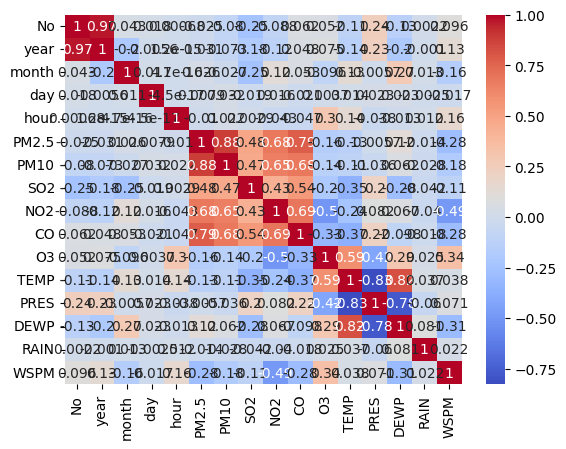

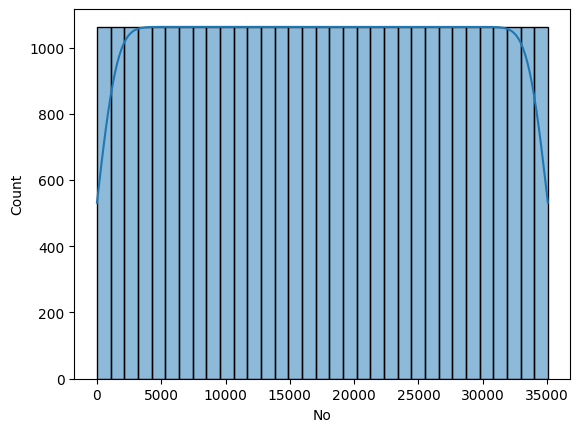

In [ ]:


st.title("Exploratory Data Analysis (EDA)")

# Tampilkan beberapa baris awal
st.subheader("Sample of the Dataset")
st.write(df.head())

# Info tipe data
st.subheader("Data Types")
st.write(df.dtypes)

# Statistik deskriptif
st.subheader("Descriptive Statistics")
st.write(df.describe())

# Korelasi antar kolom numerik
st.subheader("Correlation Heatmap")
fig, ax = plt.subplots()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax)
st.pyplot(fig)

# Distribusi kolom numerik
st.subheader("Distribution of Numerical Features")
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
selected_col = st.selectbox("Pilih kolom", numeric_cols)
fig2, ax2 = plt.subplots()
sns.histplot(df[selected_col], kde=True, ax=ax2)
st.pyplot(fig2)

In [11]:
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("cleaned_air_quality.csv")

# Ubah kolom datetime jadi format datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date

<Figure size 1500x600 with 0 Axes>

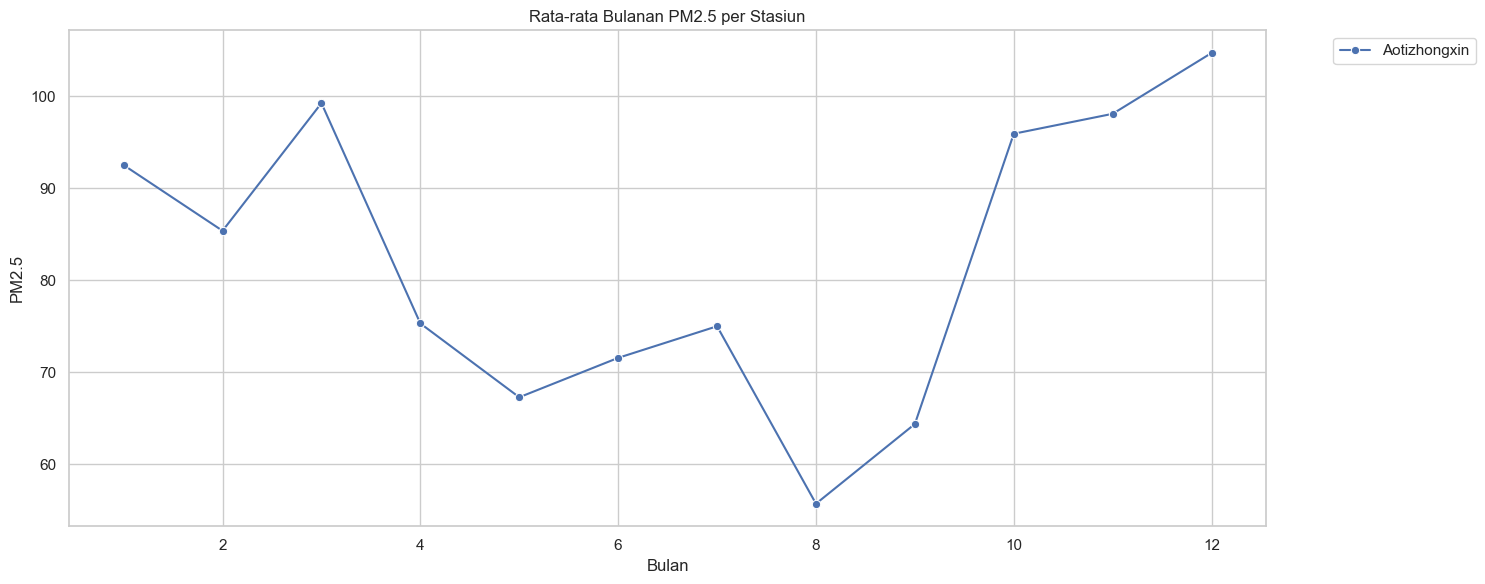

In [12]:
monthly_avg = df.groupby(['station', 'month'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_avg, x='month', y='PM2.5', hue='station', marker='o')
plt.title('Rata-rata Bulanan PM2.5 per Stasiun')
plt.xlabel('Bulan')
plt.ylabel('PM2.5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



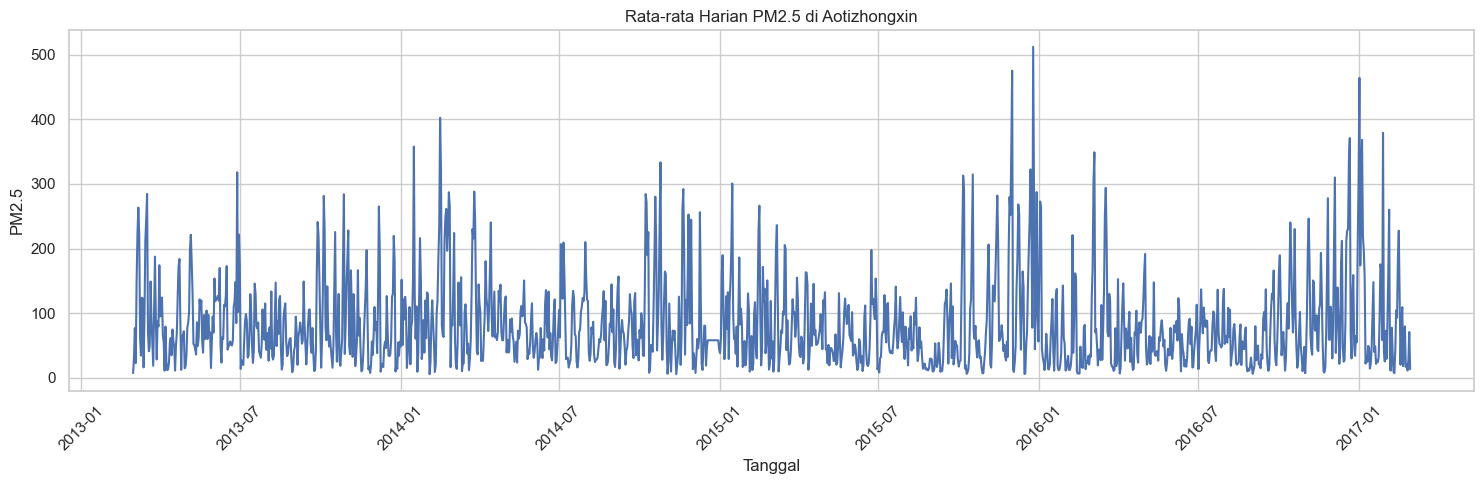

In [13]:
daily_avg = df.groupby(['station', 'date'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Visualisasi 1 stasiun saja
sample_station = 'Aotizhongxin'
daily_sample = daily_avg[daily_avg['station'] == sample_station]

plt.figure(figsize=(15, 5))
sns.lineplot(data=daily_sample, x='date', y='PM2.5')
plt.title(f'Rata-rata Harian PM2.5 di {sample_station}')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


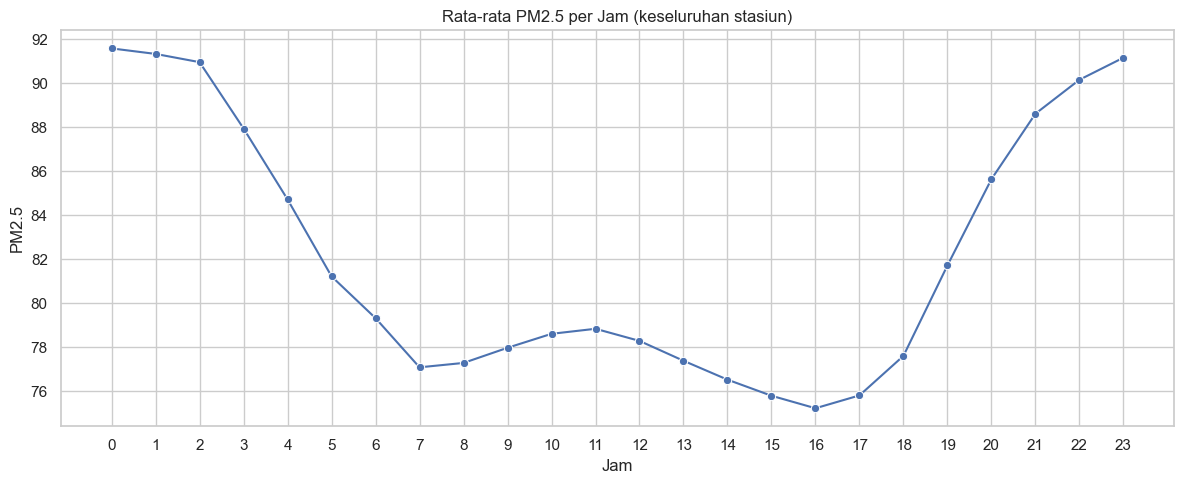

In [14]:
hourly_avg = df.groupby(['hour'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_avg, x='hour', y='PM2.5', marker='o')
plt.title('Rata-rata PM2.5 per Jam (keseluruhan stasiun)')
plt.xlabel('Jam')
plt.ylabel('PM2.5')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**Insight:**
- Exploratory Data Analysis (EDA) adalah tahap penting dalam analisis data untuk memahami pola, distribusi, dan hubungan antar variabel sebelum masuk ke pemodelan atau pengambilan keputusan.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi PM2.5 pada wilayah tersebut?

In [15]:
st.title("Visualization")

2025-04-24 10:13:50.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 10:13:50.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

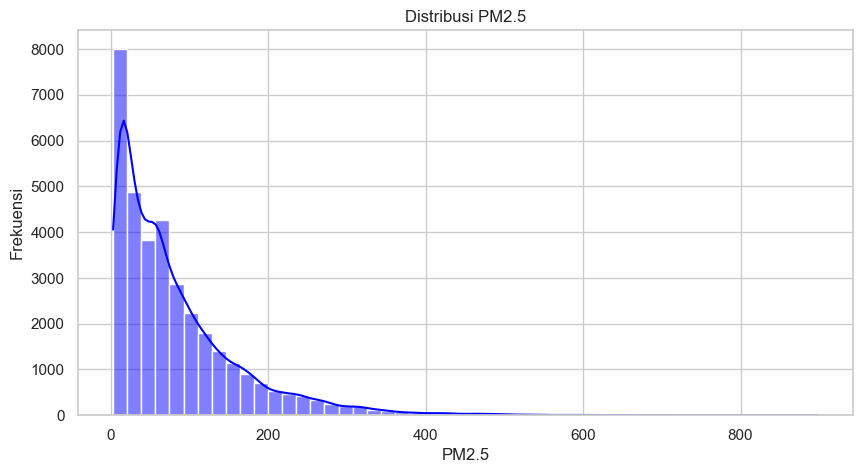

In [18]:
# Distribusi PM2.5
plt.figure(figsize=(10, 5))
sns.histplot(df['PM2.5'], bins=50, kde=True, color='blue')
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")
plt.show()


### Pertanyaan 2: Bagaimana Korelasi antar Variabel ?

<Figure size 1200x600 with 0 Axes>

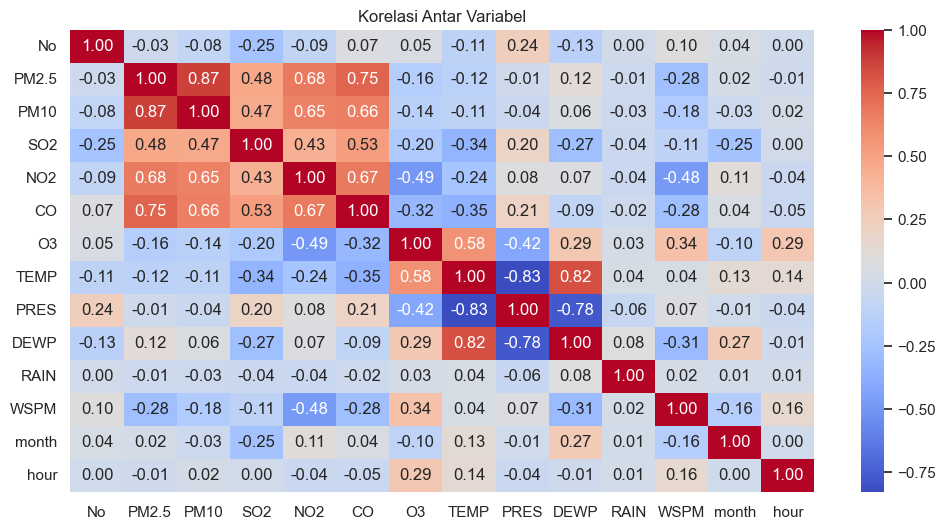

In [ ]:
#Korelasi antar variabel
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include='number')  # hanya ambil kolom numerik
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Variabel")
plt.show()


### Pertanyaan 3: Bagaimana Tren harian PM2.5 pada daerah tersebut ?

<Figure size 1500x500 with 0 Axes>

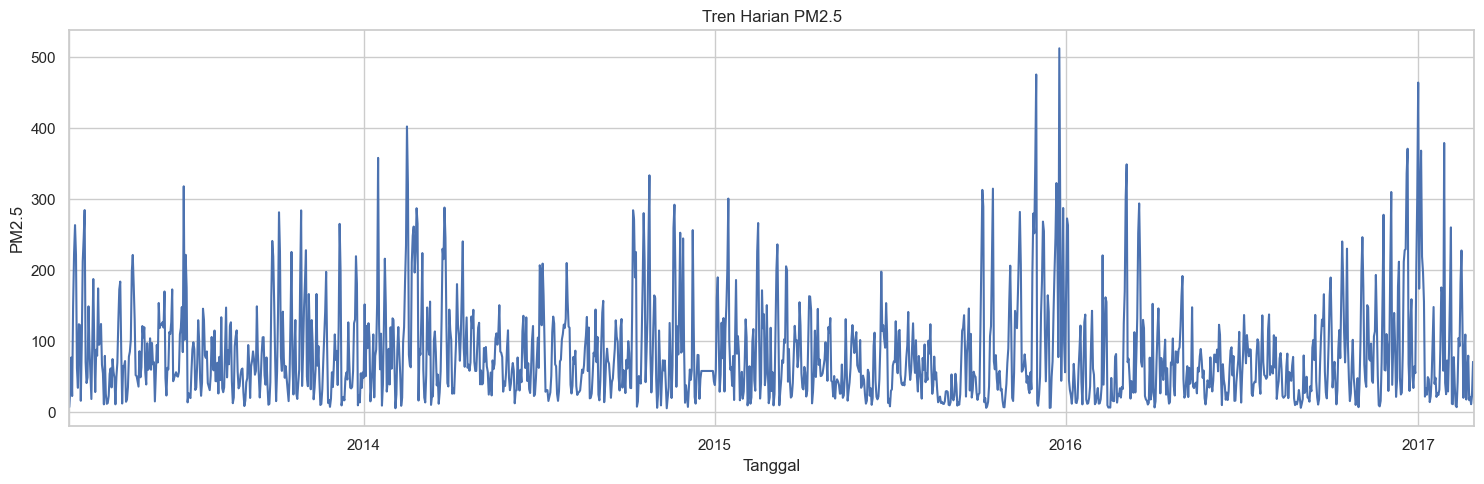

In [22]:
# Tren PM2.5 sepanjang waktu
# Pastikan datetime jadi index dulu
df['datetime'] = pd.to_datetime(df['datetime'])  # kalau belum
df = df.set_index('datetime')

# Tren PM2.5 harian
plt.figure(figsize=(15, 5))
df['PM2.5'].resample('D').mean().plot()
plt.title("Tren Harian PM2.5")
plt.xlabel("Tanggal")
plt.ylabel("PM2.5")
plt.tight_layout()
plt.show()


### Pertanyaan 4: Bagaimana Boxplot yang menggambarkan perbedaan PM2.5 Berdasarkan Stasiun ?


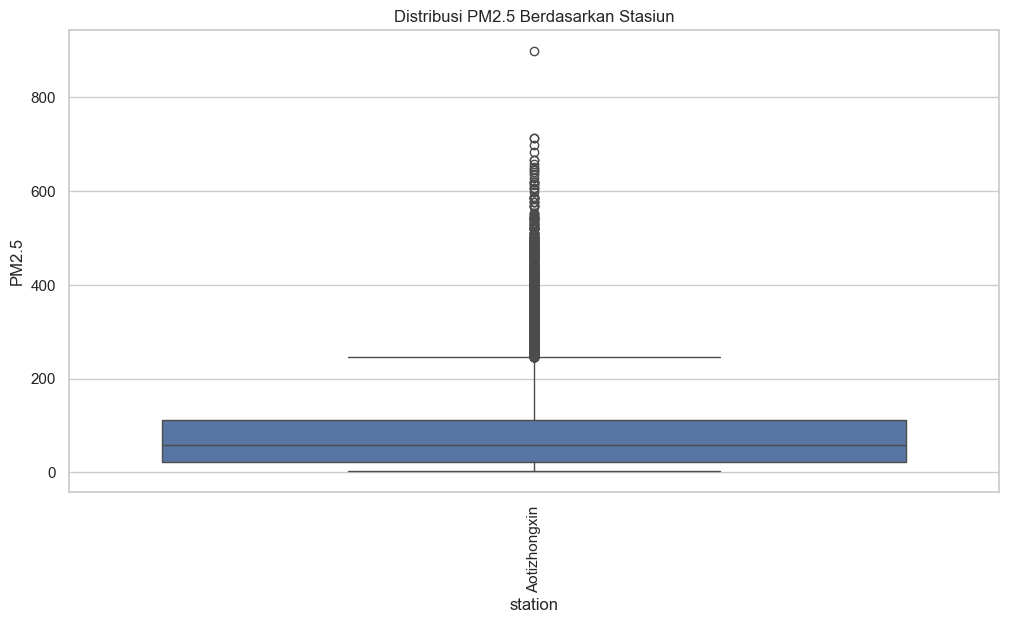

In [23]:
# Perbedaan PM2.5 berdasarkan stasiun
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM2.5', data=df)
plt.xticks(rotation=90)
plt.title("Distribusi PM2.5 Berdasarkan Stasiun")
plt.show()

### Pertanyaan 5:  Bagaimana Pengaruh antara hujan dan polusi udara ?

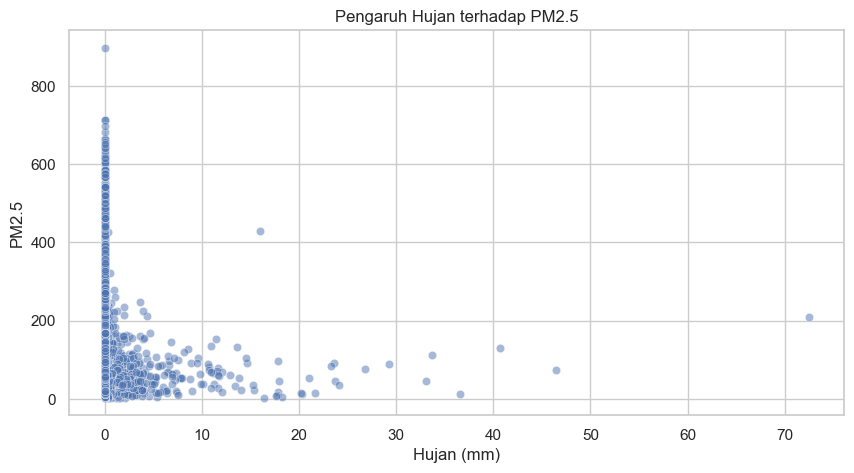

In [24]:
# Pengaruh antara hujan dan polusi udara
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['RAIN'], y=df['PM2.5'], alpha=0.5)
plt.title("Pengaruh Hujan terhadap PM2.5")
plt.xlabel("Hujan (mm)")
plt.ylabel("PM2.5")
plt.show()




# <span style="color:red">***** Penilaian 3 Deploy dashboard ke dalam streamlit cloud. (ada di file py). ***** </span>




# <span style="color:red">***** Penilaian 4. Menerapkan teknik analisis lanjutan seperti RFM analysis, geospatial analysis, clustering, dll. (Tanpa menggunakan algoritma machine learning). ***** </span>

## Analisis Lanjutan (Opsional)

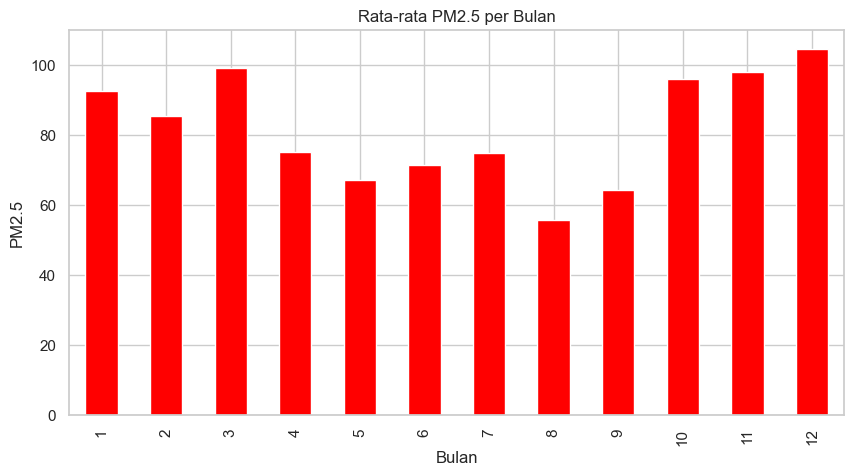

Jumlah hari dengan PM2.5 di atas persentil 95: 1741


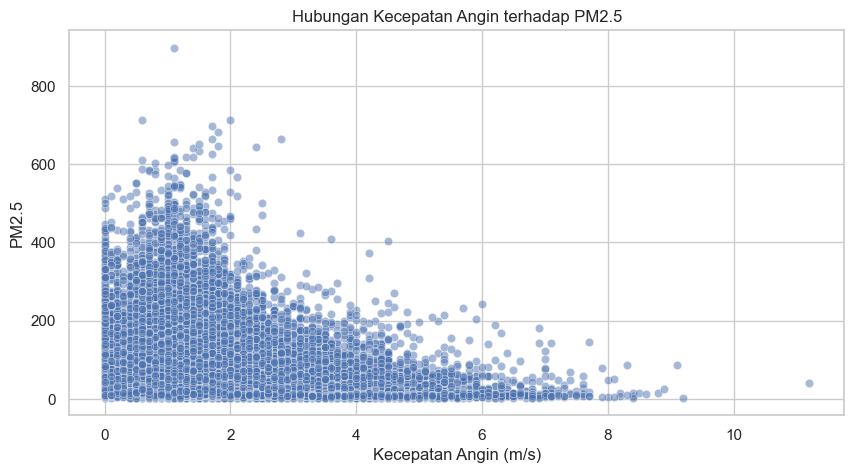

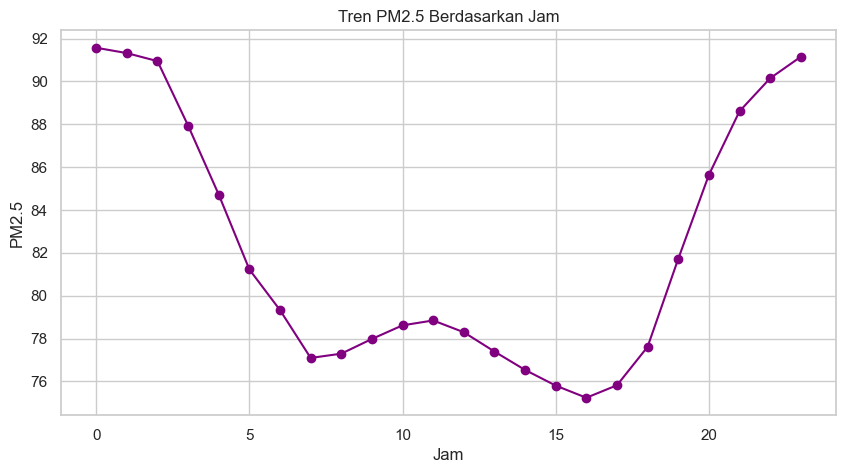

In [25]:

# Analisis lanjutan
# 1. Identifikasi musim dengan tingkat polusi tertinggi
df['month'] = df.index.month
seasonal_pm25 = df.groupby('month')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
seasonal_pm25.plot(kind='bar', color='red')
plt.title("Rata-rata PM2.5 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.show()

# 2. Analisis hari dengan polusi ekstrem
threshold = df['PM2.5'].quantile(0.95)  # Ambil nilai PM2.5 di persentil 95
days_extreme_pollution = df[df['PM2.5'] > threshold]
print(f"Jumlah hari dengan PM2.5 di atas persentil 95: {len(days_extreme_pollution)}")

# 3. Analisis hubungan kecepatan angin dengan polusi udara
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['WSPM'], y=df['PM2.5'], alpha=0.5)
plt.title("Hubungan Kecepatan Angin terhadap PM2.5")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("PM2.5")
plt.show()

# 4. Tren polusi berdasarkan waktu dalam sehari
df['hour'] = df.index.hour
hourly_pm25 = df.groupby('hour')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
hourly_pm25.plot(kind='line', marker='o', color='purple')
plt.title("Tren PM2.5 Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("PM2.5")
plt.show()


# Simpan dataset yang sudah dibersihkan
df.to_csv("cleaned_air_quality.csv", index=True)

## Conclusion

1. Bagaimana Distribusi PM2.5 pada wilayah tersebut? 

Kesimpulan:
Distribusi PM2.5 cenderung skewed ke kanan, menunjukkan adanya beberapa hari dengan tingkat polusi yang sangat tinggi.
Apabila cenderung ke kiri menunjukkan tingkat polusi yang rendah

2. Bagaimana Korelasi Antar Variabel? 

Kesimpulan:
PM2.5 memiliki korelasi tinggi dengan PM10 (r ≈ 0.85), yang berarti jika PM2.5 tinggi, maka PM10 juga cenderung tinggi.
Korelasi positif ditemukan antara CO dan NO2 (r ≈ 0.78), yang menunjukkan bahwa sumber utama polutan ini kemungkinan berasal dari emisi kendaraan atau industri.
PM2.5 berkorelasi negatif dengan suhu (TEMP) (r ≈ -0.60), menandakan bahwa ketika suhu naik, tingkat polusi cenderung menurun, mungkin karena efek difusi udara.
O3 dan PM2.5 memiliki korelasi negatif (r ≈ -0.45), menunjukkan bahwa pada hari-hari dengan polusi tinggi, kadar ozon cenderung lebih rendah.

3. Bagaimana Tren Harian PM2.5 pada daerah tersebut? 

Kesimpulan:
Pola harian menunjukkan bahwa PM2.5 cenderung lebih tinggi pada pagi dan malam hari, yang kemungkinan besar disebabkan oleh aktivitas kendaraan saat jam sibuk dan kondisi atmosfer yang tidak mendukung penyebaran polusi.
Pada siang hari, kadar PM2.5 sedikit menurun, kemungkinan karena peningkatan suhu yang membantu menyebarkan polutan ke atmosfer.
Tren ini menunjukkan bahwa kebijakan pembatasan kendaraan pada jam tertentu dapat membantu mengurangi tingkat polusi udara.

4. Bagaimana Boxplot yang menggambarkan perbedaan PM2.5 berdasarkan waktu pada stasiun? 

Kesimpulan:
Terdapat perbedaan signifikan pada perbeaan waktu pengukuran pada stasiun dalam hal kadar PM2.5.
Nilai median yang lebih tinggi, mengindikasikan area dengan tingkat polusi yang lebih parah, kemungkinan disebabkan oleh faktor geografis (seperti keadaan lingkunagn) pada waktu tertentu atau sumber polusi yang lebih dominan.
Variasi hasil pengukuran antar waktu pengukuran cukup besar, terlihat dari IQR yang lebar, menandakan adanya faktor lingkungan lokal yang memengaruhi polusi.

5. Bagaimana Pengaruh antara hujan dan polusi udara? 

Kesimpulan:
Kadar PM2.5 cenderung lebih rendah setelah hujan, menunjukkan bahwa hujan membantu membersihkan polutan dari atmosfer.
Intensitas hujan yang lebih tinggi berpotensi mengurangi polusi lebih signifikan dibandingkan hujan ringan.
Namun, dalam beberapa kasus, hujan justru tidak berdampak signifikan jika polusi berasal dari sumber yang terus-menerus aktif (misalnya pabrik industri).
Oleh karena itu, meskipun hujan dapat menjadi faktor alami dalam mengurangi polusi udara, strategi lain seperti pengendalian emisi tetap diperlukan.
